# LDA: Linear Discriminant Analysis
#### Eduarda Almeida Garrett de Carvalho - 14566794
#### Lázaro Pereira Vinaud Neto - 14675396
### Algebra Linear e Aplicações (SME0142)
A **Análise de Discriminante Linear** é uma técnica supervisionada amplamente utilizada em aprendizado de máquina para classificação e redução de dimensionalidade. Difere do **Principal Component Analysis (PCA)**, pois enquanto o PCA foca em maximizar a variância dos dados, o LDA tenta maximizar a separação entre as classes no conjunto de dados e minimizar a variância entre uma mesma classe.

## Objetivo do LDA

O principal objetivo do LDA é encontrar um espaço de características onde as diferentes classes de dados se separem da melhor forma possível. Para isso, o LDA maximiza a **separabilidade** entre as classes, ao mesmo tempo que minimiza a dispersão dentro de cada classe.

## Diferença entre LDA e PCA

Embora tanto o **LDA** quanto o **PCA** sejam técnicas de redução de dimensionalidade, elas diferem em seus objetivos:

- O **PCA** busca capturar a maior variabilidade possível nos dados, sem considerar as classes.
- O **LDA**, por outro lado, foca em otimizar a separação entre as classes, o que o torna mais adequado para tarefas de classificação supervisionada.

## Como funciona o LDA?

Como dito anteriormente, o foco do LDA consiste em maximizar a proporção entre a dispersão entre diferentes classes e a dispersão "intra" classes, de maneira que classes diferentes estejam distantes entre si e elementos da amostra de uma mesma classe estejam bem agrupados, inicialmente analisaremos o caso com duas classes e depois generalizaremos:

## Duas Classes



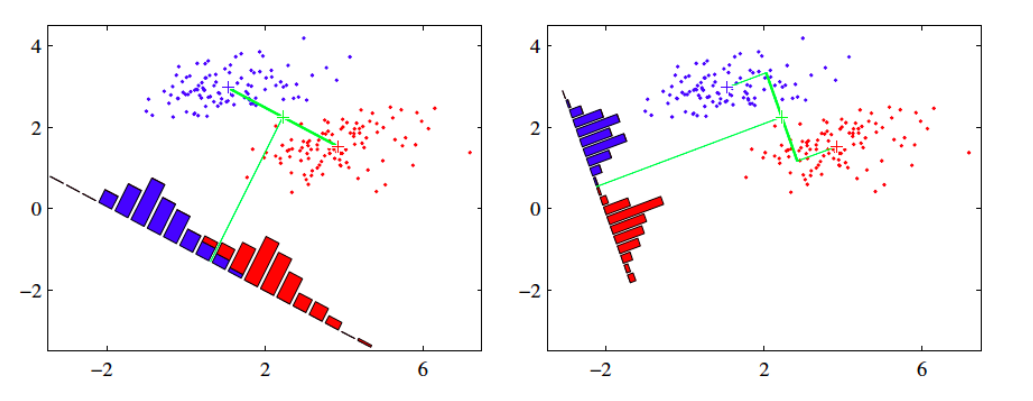

O objetivo é encontrar uma reta que divida bem duas classes, como no exemplo da imagem à direita. Portanto, devemos encontrar o vetor discriminante $θ$ para o qual as projeções das amostras nele se encontrem agrupadas na mesma classe e distantes entre diferentes classes.


Seja $u_i$ uma amostra de $D$ dimensões e $ (u_1, u_2, \dots, u_m) $ um conjunto de $m$ amostras, classificadas em $k = 2$ classes, denotadas cada uma por $C_i$. Cada classe com $N_i$ elementos


$$y_i = \theta^Tu_i$$

Onde $y_i$ é a projeção do vetor $u_i$ no vetor $\theta$ essa projeção é dada por um produto escalar, pois apenas queremos saber o quão "na direção" do vetor a amostra está.

$$ {U_k} = \frac{1}{N_k} \sum_{u \in C_k} u $$ $$ {U} = \frac{1}{m} \sum_{i=1}^{m} u_i = \frac{1}{m} \sum_{i = 1}^{k} N_iU_i $$ $$ \hat{U_k} = \frac{1}{N_k} \sum_{y \in C_k} y = \frac{1}{N_k} \sum_{u \in C_k}\theta^Tu_i$$ $$ \hat{U} = \frac{1}{m} \sum_{i=1}^{m} y_i = \frac{1}{m} \sum_{i = 1}^{k} N_iU_i $$

Onde ${U_k}$ é o vetor médio  de uma classe e ${U}$ é o vetor médio global. Os vetores $\hat{U_k}$ e $\hat{U}$ são os vetores médios transformados de cada classe e o vetor médio transformado global, respectivamente.

Definindo a variância entre classes como $\hat{U_1} - \hat{U_2} = \theta^T(U_1 - U_2)$ e a variâcia dentro de uma mesma classe como $S_{wk} = \sum_{i \in C_k} (y_i - \hat{U_k})^2$

Temos finalmente, nossa função que queremos maximizar:
$$J(\theta) = \frac{(\hat{U_1} - \hat{U_2})^2}{S_{w1} + S_{w2}}$$

Definindo agora em forma de dispersão, podemos calcular matrizes de dispersão pelo **produto externo**, um produto que gera a matriz onde cada elemento é produto de um componente de um vetor pelo outro, útil para modelar interações entre vetores.

Matriz de dispersão de uma classe:
$$ S_k = \sum_{u_i \in C_k} (u_i - U_k) (u_i - U_k)^T$$

Matriz de dispersão intra classes:
$$ S_w = S_1 + S_2$$

Matriz de dispersão entre classes:
$$ S_b = (U_1 - U_2)(U_1 - U_2)^T $$

Desenvolvendo a variância dentre uma classe e a relacionando à matriz de dispersão em uma mesma classe,
$$ S_{wk} = \sum_{y_i \in C_k}(y_i - U_k)^2 = \sum_{u_i \in C_k}(\theta u_i - \theta U_k)^2 = \sum_{u_i \in C_k}\theta^T(u_i - U_k)(u_i - U_k)^T\theta = \theta^TS_k\theta$$

e portanto,
$$S_{w1} + S_{w2} = \theta^TS_w\theta$$

Desenvolvendo a variância entre classes,
$$ (\hat{U_1} - \hat{U_2})^2 = (\theta^T U_1- \theta^T U_2)^2 = \theta^T(U_1 - U_2)(U_1 - U_2)\theta = \theta^TS_b\theta$$

###Função final para duas classes
$$J(\theta) = \frac{\theta^TS_b\theta}{\theta^TS_w\theta}$$

Para maximizá-la igual a uma função de $\theta$, derivamos ela em $\theta$ e igualamos a derivada a 0. O processo de derivação será omitido, mas resulta em $\theta$ ótimo $=$ $S_w^{-1}(U_1-U_2)$

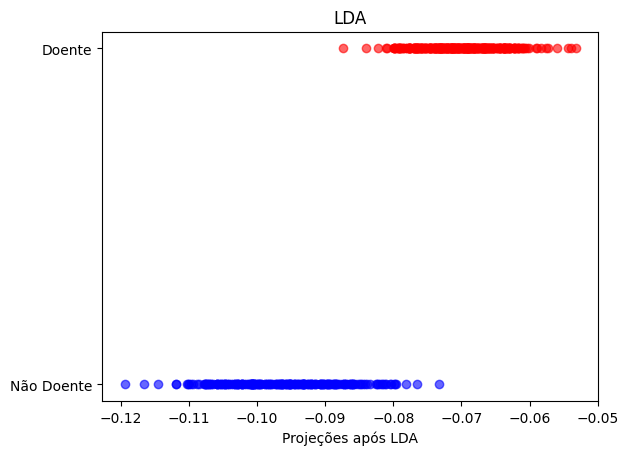

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

#carrego um dataset de pacientes que realizam exames para saber se tem cancer de mama
breast_cancer = load_breast_cancer()

X = np.array(breast_cancer.data)
Y = np.array(breast_cancer.target)

#vou pegar o vetor médio de cada classe, usando a função np.mean para isso

mean_vector_disease = np.mean(X[Y == 1], axis = 0)

mean_vector_Notdisease = np.mean(X[Y==0], axis = 0)

#agora vou calular Sw, a matriz de dispersão intra classe, ou seja a dispersão do vetor médio de cada classe.

#primeiro, pego cada vetor de uma classe e subtraio do vetor médio dela, achando a diferença de cada amostra para a média da classe.
#depois, usando do produto externo, acho a matriz de dispersão para aquela amostra e somo todas as matrizes de dispersão encontradas.

#inicializando Sw com zeros
Sw = np.zeros((X.shape[1], X.shape[1]))

#para cada amostra com a doença,
for vectorDisease in X[Y == 1]:
  subtraction = vectorDisease - mean_vector_disease
  #o np.outer calcula o produto externo de dois vetores, portanto transforma o segundo em uma coluna automaticamente
  dispersion_matrix = np.outer(subtraction, subtraction)
  Sw += dispersion_matrix

#para cada amostra sem a doença
for vectorNotDisease in X[Y == 0]:
  subtraction = vectorNotDisease - mean_vector_Notdisease
  dispersion_matrix = np.outer(subtraction, subtraction)
  Sw += dispersion_matrix

#calculando a inversa de Sw para achar o vetor discriminante ótimo, bem como mostrado na teoria
Swinverted = np.linalg.inv(Sw)

#achei o vetor discriminante ótimo, como descrito na explicação
optimum_vector = np.dot(Swinverted, (mean_vector_disease - mean_vector_Notdisease))

#agora, basta plotar as classes agora separadas pelo lda de 30 dimensões para uma

#calculando as projeções dos vetores da amostra, que serão utilizadas como o eixo x na plotagem

projections = np.dot(X, optimum_vector)
plt.xlabel('Projeções após LDA')
plt.title('LDA')

#projetando os com a doença em vermelhos, em y = 1, apenas para melhor visualização, pois afinal, todas as projeções são em uma mesma reta.(Dimensão = 1)
plt.yticks([0, 1], ['Não Doente', 'Doente'])

plt.scatter(projections[Y == 1], np.ones_like(projections[Y==1]), color='red', alpha = 0.6)
#projetando os sem a doença em azul, em y = 0.
plt.scatter(projections[Y == 0], np.zeros_like(projections[Y==0]), color='blue', alpha = 0.6)

plt.show()

Apesar de ainda haver intersecção entre as classes, foi encontrado um vetor que consegue separa-las consideravelmente bem unindo as amostras de mesma classe, após uma redução de 30 dimensões para 1 apenas.

## $k$ Classes


Seja $u_i$ uma amostra de $D$ dimensões e $ (u_1, u_2, \dots, u_m) $ um conjunto de $m$ amostras, classificadas em $k$ classes, denotadas cada uma por $C_i$. Cada classe com $N_i$ elementos


A idéia é conseguir escrever a proporção desejada matemáticamente para conseguir maximizá-la.
Portanto, considere:

$$ y_i = \Theta^T u_i $$

Onde $y_i$ é a projeção do vetor $u_i$ no novo espaço adquirido após a redução de dimensionalidade da LDA, $\Theta$ é a matriz de projeção que queremos encontrar, essa matriz será formada por $k-1$ colunas, onde cada colunas é um vetor de projeção $\theta_i$.
Mais tarde, provaremos que essa matriz gera um espaço de dimensão de no máximo $k - 1$, portanto reduzindo considerávelmente a dimensão das amostras.

$$ \hat{U_k} = \frac{1}{N_k} \sum_{y \in C_k} y $$ $$ \hat{U} = \frac{1}{m} \sum_{i=1}^{m} y_i = \frac{1}{m} \sum_{i = 1}^{k} N_iU_i $$

Onde $\hat{U_k}$ é o vetor médio transformado de uma classe e $\hat{U}$ é o vetor médio transformado global.

$$\hat{S_i} = \sum {(y - \hat{U_i})(y - \hat{U_i})^T}\space|\space y \in C_i$$ $$ \hat{S_w} = \sum_{i = 1}^{k} \hat{S_i}$$

Onde $\hat{S_i}
$ é a matriz de dispersão de dados entre os vetores transformados de uma mesma classe, já que estamos fazendo a diferença de cada valor transformado pela média transformada daquela classe e $\hat{S_w}$ é a dispersão de dados total.

$$ \hat{S_b} = \sum_{i = 1}^{k}N_i(\hat{U_i} - \hat{U})(\hat{U_i} - \hat{U})^T $$

Onde $\hat{S_b}$ é a dispersão entre classes, já que considera a diferença entre a média de cada classe com a média global.

Considerando as igualdades de dispersão mostradas no caso de 2 classes, a função final que se deve maximizar é:
$$ J(\Theta) = \frac{det(\Theta^TS_b\Theta)}{det(\Theta^TS_w\Theta)}$$

os determinantes são para deixar a função em volta de um escalar, já que $\Theta$ é uma matriz.

Após a derivação que será omitida, encontra-se que a forma de maximizar a função é encontrando um escalar $\lambda_i$ tal que $(S_b - \lambda_i S_w) \theta_i^* = 0$; onde $\theta_i^*$ é um vetor discriminante ótimo.

fazendo:
$$(S_b - \lambda_i S_w) \theta_i^* = 0$$
$$S_b\theta_i^* = \lambda_iS_w\theta_i^*$$

multiplicando $S_w^{-1}$ em ambos os lados,
$$S_w^{-1}S_b\theta_i^* = \lambda_i\theta_i^*$$
sendo $\theta_i^*$ um vetor (discriminante ótimo que buscamos), e $\lambda_i$ um escalar, percebe-se que é um caso de autovalor e autovetor. Onde $\theta_i^*$ é um autovetor da matriz $S_w^{-1}S_b$ e $\lambda_i$ é seu autovalor.

Finalmente, para se encontrar os vetores discriminantes ótimos deve-se então buscar os autovetores da matriz $S_w^{-1}S_b$.

Aqui está o motivo da LDA reduzir para no máximo $k-1$ dimensões, como $S_b$, apesar de ser uma matriz $D$x$D$, tem rank ou espaço gerado de dimensão máxima $k-1$, pois como as dispersões entre as classes estão ligadas pela média, no sentido de que $\sum_{i = 1}^{k}(S_bk - \hat{U}) = 0$, quer dizer que existe uma combinação linear entre os $k$ vetores de dispersão e portanto, há pelo menos $k$ vetores l.d. Sendo assi, há no máximo $k-1$ autovetores que serão a base do novo espaço.

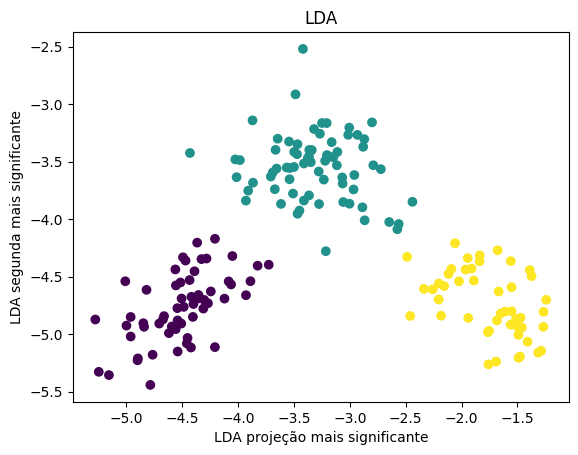

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine = load_wine()

X = np.array(wine.data)
Y = np.array(wine.target)

#pegando as classes do dataset com 3 classes

classes = np.unique(Y)

#vou pegar o vetor médio de cada classe e agora armazená-los em um dicionario

mean_vectors = {}

for c in classes:
  class_data = X[Y == c]
  mean_vectors[c] = np.mean(class_data, axis = 0)

#agora vou calular Sw, a matriz de dispersão intra classe, ou seja a dispersão do vetor médio de cada classe.

#primeiro, pego cada vetor de uma classe e subtraio do vetor médio dela, achando a diferença de cada amostra para a média da classe.
#depois, usando do produto externo, acho a matriz de dispersão para aquela amostra e somo todas as matrizes de dispersão encontradas.

Sw = np.zeros((X.shape[1], X.shape[1]))

for c in classes:
  for vector in X[Y == c]:
    subtraction = vector - mean_vectors[c]
    #o np.outer calcula o produto externo de dois vetores, portanto transforma o segundo em uma coluna automaticamente
    dispersion_matrix = np.outer(subtraction, subtraction)
    Sw += dispersion_matrix

#calculando a inversa de Sw para achar o vetor discriminante ótimo
Swinverted = np.linalg.inv(Sw)

#agora, em problemas de múltiplas classes, precisamos achar a dispersão entre classes Sb

#calculando o vetor médio global para calcular Sb

global_mean = np.mean(X, axis = 0)

Sb = np.zeros((X.shape[1], X.shape[1]))

for c in classes:
  subtraction = mean_vectors[c] - global_mean
  dispersion_matrix = np.outer(subtraction, subtraction)
  Ni = X[Y == c].shape[0]
  Sb += dispersion_matrix * Ni

#agora, com Sw invertida e Sb, posso encontrar a matriz da qual quero os autovetores que serão os vetores discriminantes

final_matrix = np.dot(Swinverted, Sb)

#agora, calculo seus autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(final_matrix)

#ordenando os autovalores para usar apenas aqueles das 2 direções mais significativas
sorted_indices = np.argsort(eigenvalues)[::-1]  #ordeno os indices para conseguir relacionar o autovalor ao autovetor
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

#pegando os autovetores correspondentes aos dois maiores autovalores
top_eigenvector = eigenvectors_sorted[:, 0]
second_eigenvector = eigenvectors_sorted[:, 1]

#faço as projeções nessas duas simensões e plot
X_lda = np.dot(X, top_eigenvector)
Y_lda = np.dot(X, second_eigenvector)
# Visualize the projection of the data (optional)
plt.scatter(X_lda, Y_lda, c=Y, cmap='viridis')
plt.title("LDA")
plt.xlabel("LDA projeção mais significante")
plt.ylabel("LDA segunda mais significante")
plt.show()

Por fim, as três classes foram reduzidas de dimensão 13 para apenas 2 com bom grau de separação entre elas, bem como um bom agrupamento.

#Tópicos de Algebra Linear Utilizados

##Matrizes de Dispersão

As matrizes de dispersão intra-classe $S_b$ e entre classes $S_w$ São obtidas pelo produto externo das diferenças entre vetores médios, usando a função de numpy np.outer.

##Operações Matriciais

Ao longo do processo da LDA, operações como **inversão de matrizes**, cálculo de **vetores médios** e **produtos externos** são feitos usando a biblioteca numpy, com operações como a np.dot e np.linalg.inv,

##Autovalores e Autovetores

Os autovelores e autovetores são calculados para a matriz $S_w^{-1}S_b$, a fim de encontrar as direções com mais separabilidade dos dados. Feito usando a função de numpy np.lingalg.eig

##Projeção de Dados

Os dados tiveram suas dimensões reduzidas para até 2 dimensões mais significantes e tiveram suas projeções plotadas para visualização